## Alucar - > Analisando As Vendas

In [51]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt 

In [52]:
alucar = pd.read_csv('alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [53]:
alucar.shape

(24, 2)

In [54]:
alucar.isna().sum().sum()

0

In [55]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [56]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

<AxesSubplot:xlabel='mes', ylabel='vendas'>

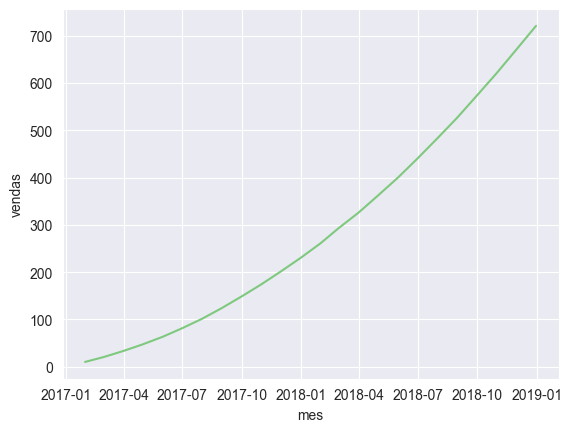

In [57]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar)

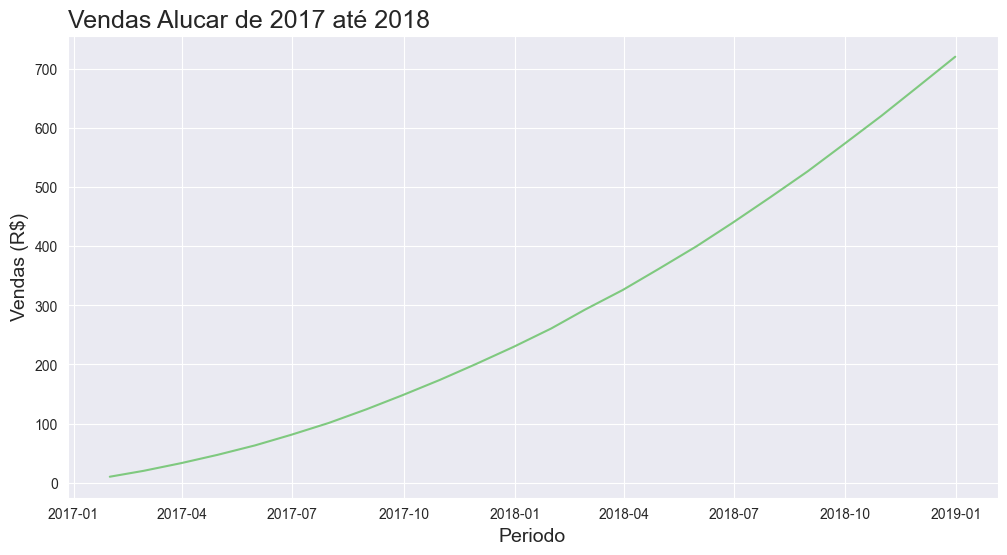

In [58]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'mes', y = 'vendas', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 até 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Periodo', fontsize = 14)
ax.set_ylabel('Vendas (R$)', fontsize = 14)
ax = ax

In [59]:
alucar['Aumento'] = alucar['vendas'].diff()
alucar['Aumento'] = alucar['Aumento'].fillna(0)
alucar.rename(columns = {'mes': 'Mes', 'vendas': 'Vendas'}, inplace = True) 
alucar.head()

,Mes,Vendas,Aumento
0,2017-01-31,10,0.0
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


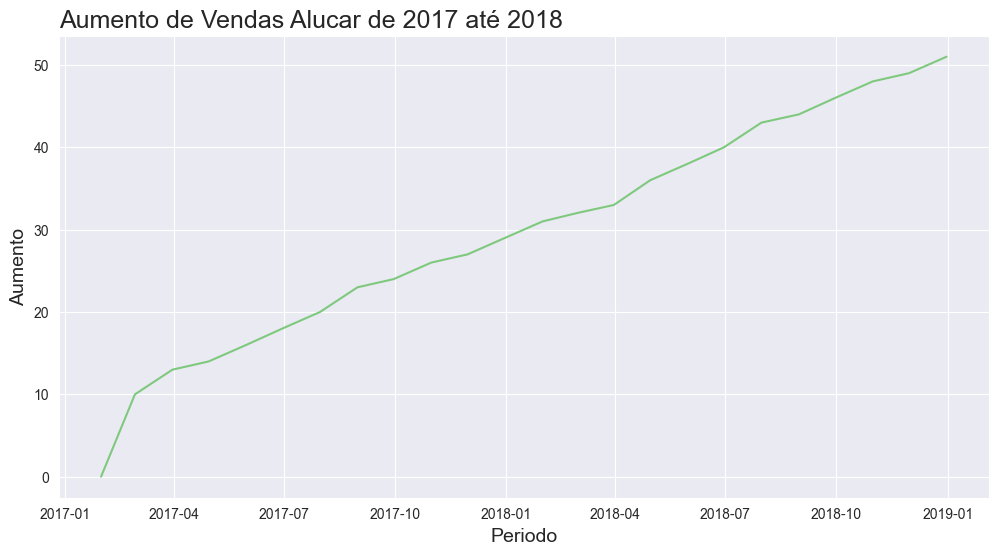

In [60]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x = 'Mes', y = 'Aumento', data = alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento de Vendas Alucar de 2017 até 2018', loc = 'left', fontsize = 18)
ax.set_xlabel('Periodo', fontsize = 14)
ax.set_ylabel('Aumento', fontsize = 14)
ax = ax

In [61]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x = x, y = y, data = dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc = 'left', fontsize = 18)
    ax.set_xlabel(labelx, fontsize = 14)
    ax.set_ylabel(labely, fontsize = 14)
    ax = ax

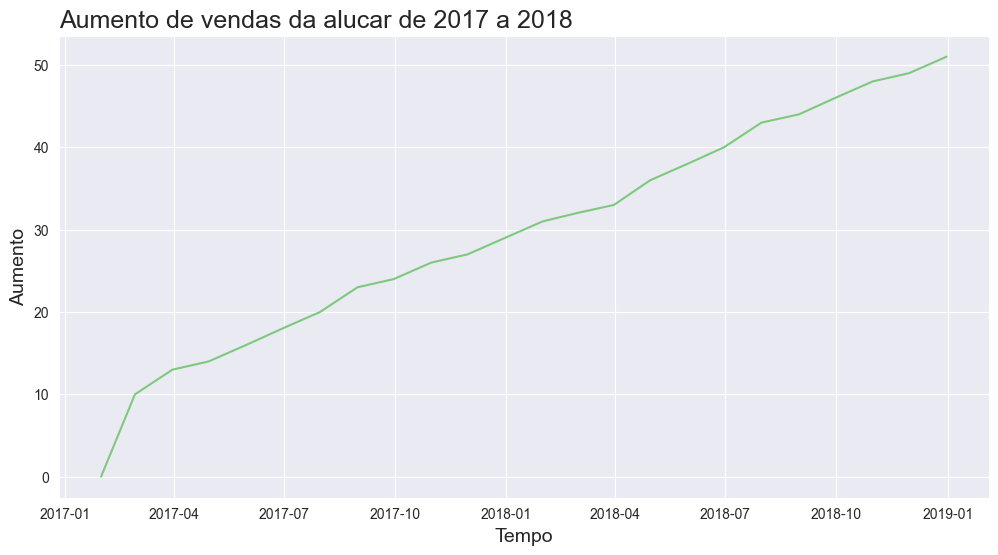

In [62]:
plotar('Aumento de vendas da alucar de 2017 a 2018', 
    'Tempo', 'Aumento', 'Mes','Aumento', alucar)

In [63]:
alucar['Aceleracao'] = alucar['Aumento'].diff()
alucar['Aceleracao'] = alucar['Aceleracao'].fillna(0)
alucar.head()

,Mes,Vendas,Aumento,Aceleracao
0,2017-01-31,10,0.0,0.0
1,2017-02-28,20,10.0,10.0
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


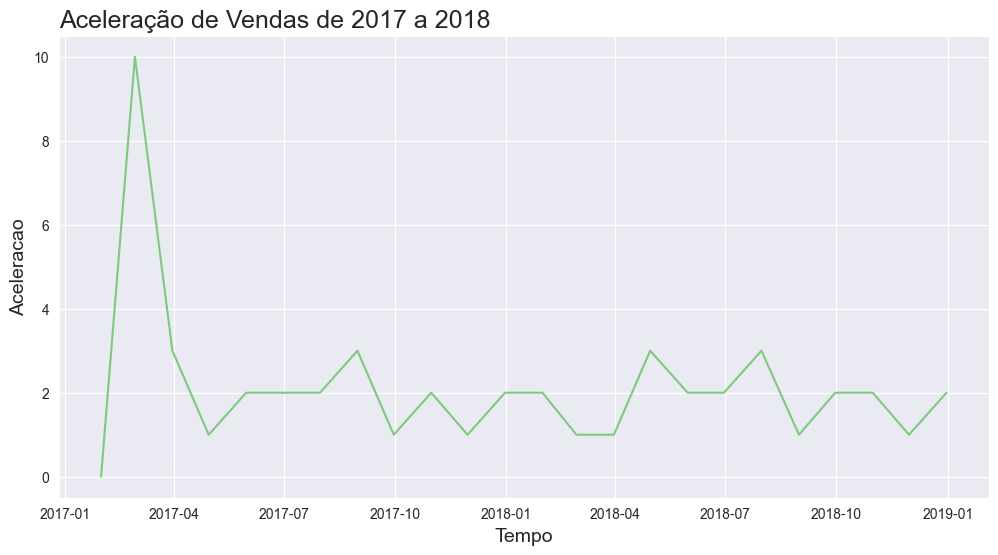

In [64]:
plotar('Aceleração de Vendas de 2017 a 2018', 'Tempo', 'Aceleracao', 'Mes',
    'Aceleracao', alucar)

<AxesSubplot:xlabel='Mes', ylabel='Aceleracao'>

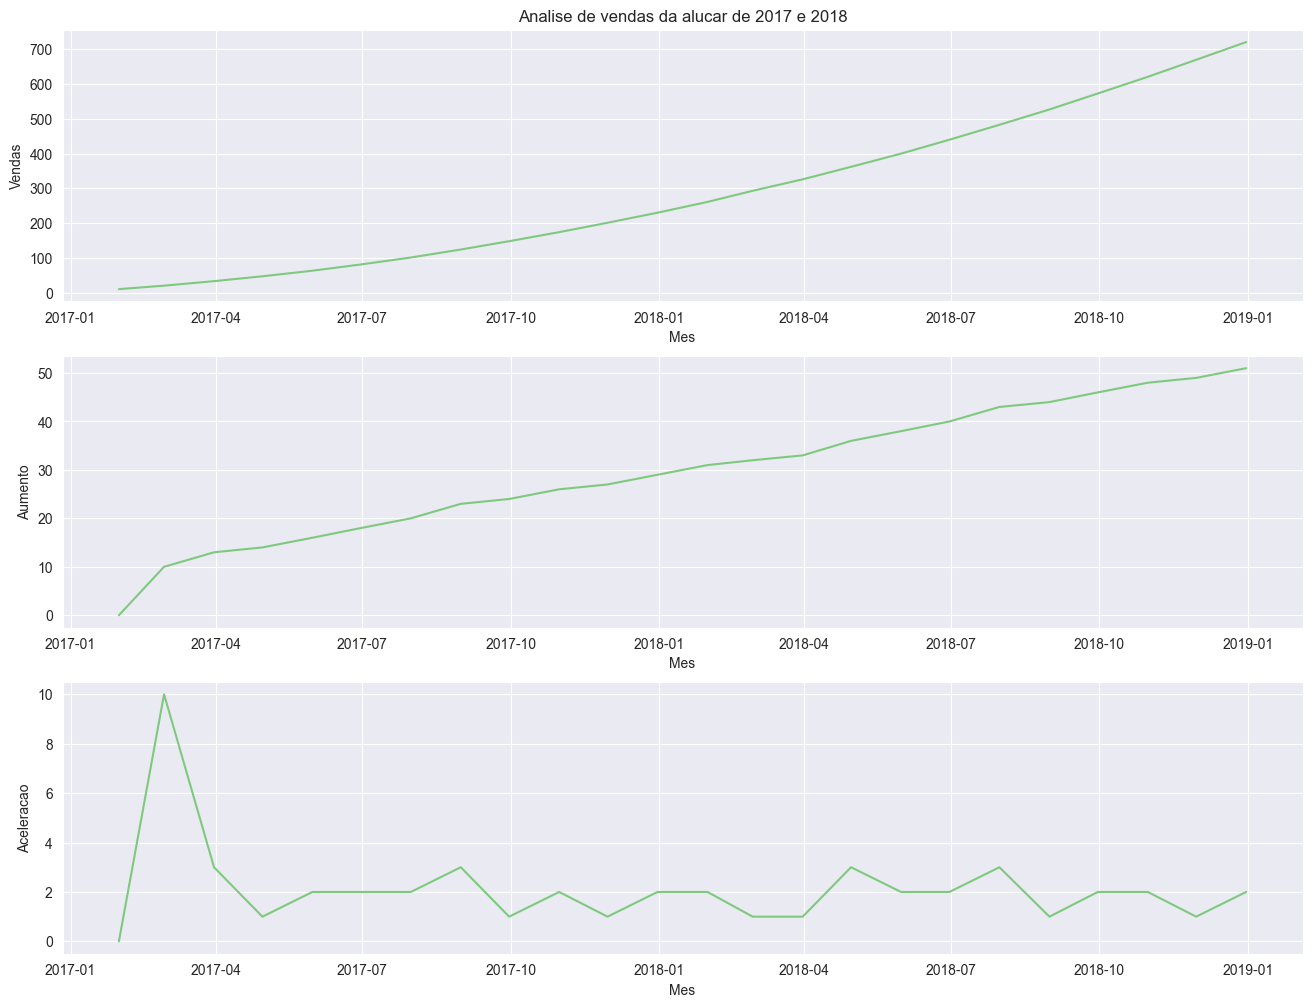

In [65]:
plt.figure(figsize = (16, 12))
ax = plt.subplot(3,1,1)
ax.set_title('Analise de vendas da alucar de 2017 e 2018')
sns.lineplot(x = 'Mes', y = 'Vendas', data = alucar)
ax = plt.subplot(3,1,2)
sns.lineplot(x = 'Mes', y = 'Aumento', data = alucar)
ax = plt.subplot(3,1,3)
sns.lineplot(x = 'Mes', y = 'Aceleracao', data = alucar)

In [66]:
def plot_de_comparacao(titulo, x, y1, y2, y3, dataset):
    plt.figure(figsize = (16, 12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)
    ax = plt.subplot(3,1,2)
    sns.lineplot(x = x, y = y2, data = dataset)
    ax = plt.subplot(3,1,3)
    sns.lineplot(x = x, y = y3, data = dataset)

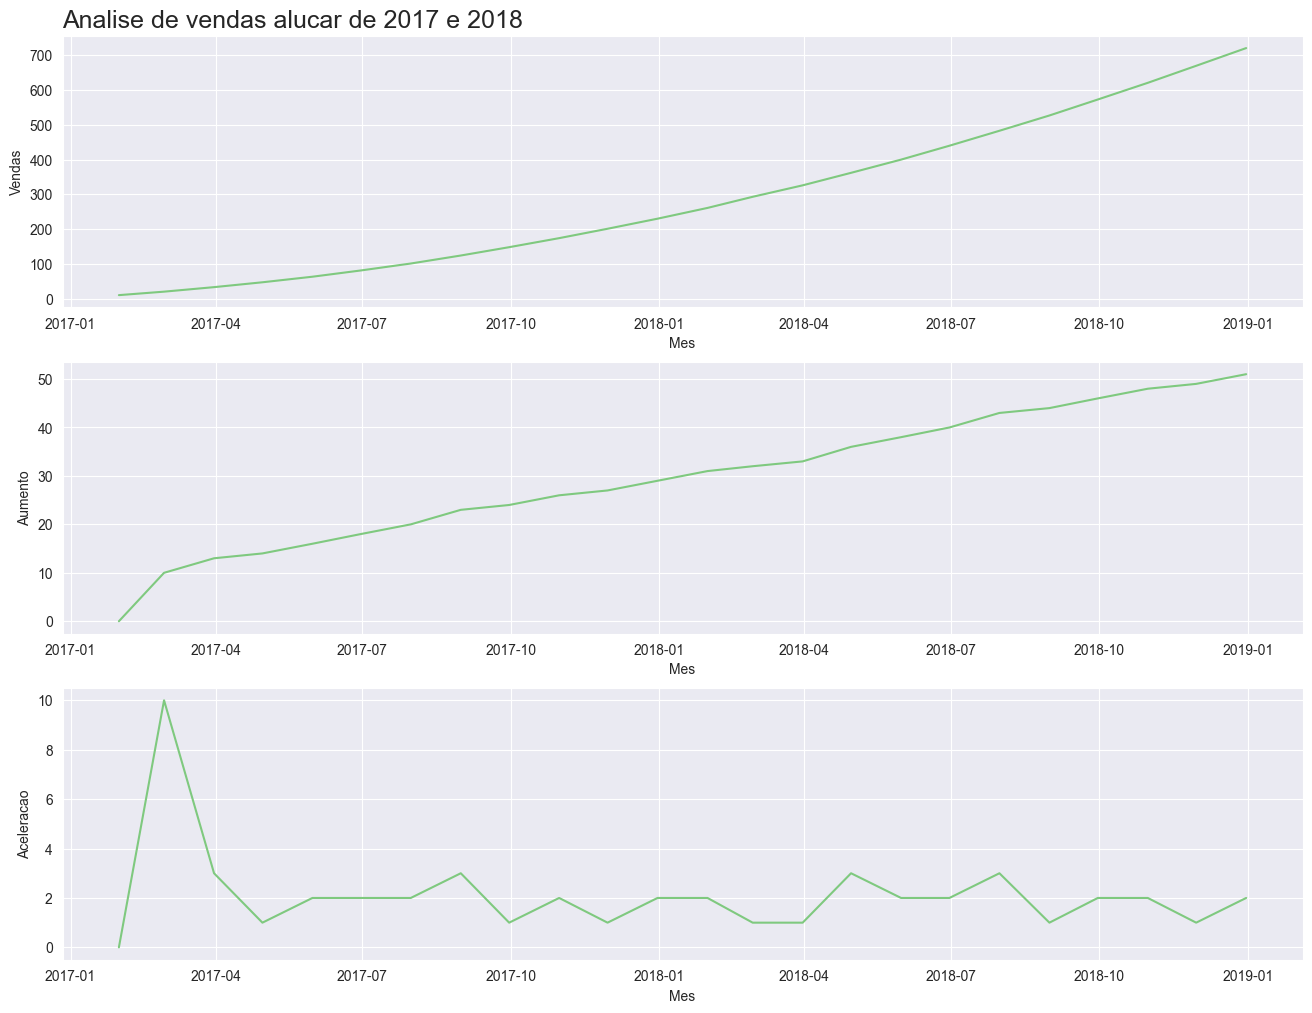

In [67]:
plot_de_comparacao('Analise de vendas alucar de 2017 e 2018',
    'Mes', 'Vendas', 'Aumento', 'Aceleracao', alucar)

In [68]:
from pandas.plotting import autocorrelation_plot

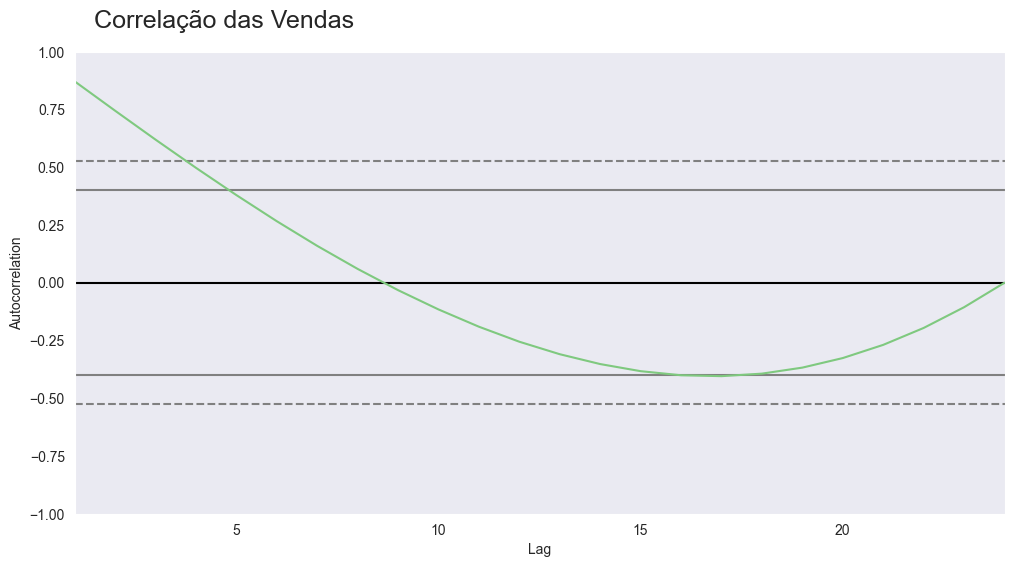

In [69]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação das Vendas', fontsize = 18, x = 0.25, y = 0.95)
autocorrelation_plot(alucar.Vendas)
ax = ax

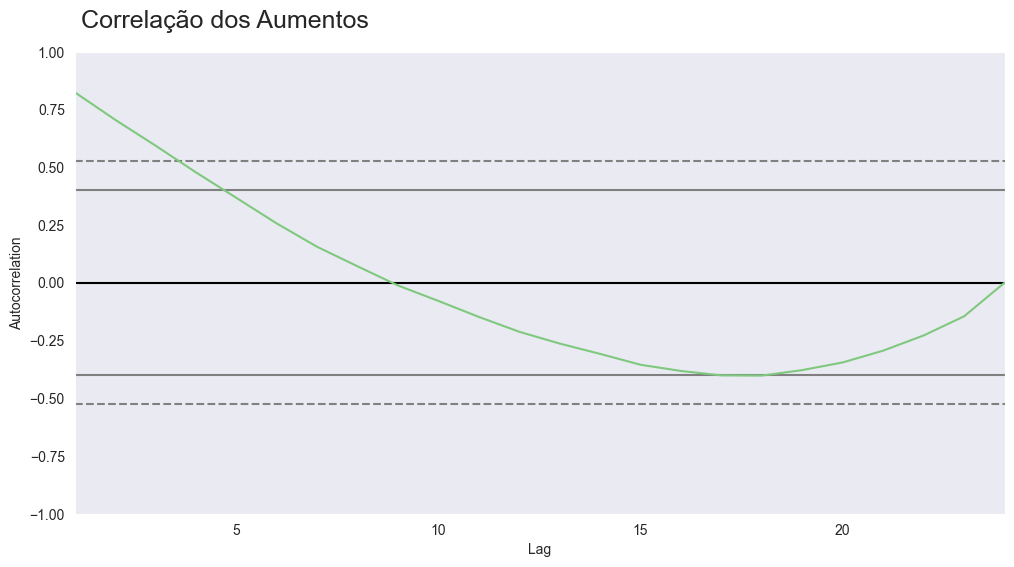

In [70]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação dos Aumentos', fontsize = 18, x = 0.25, y = 0.95)
autocorrelation_plot(alucar.Aumento)
ax = ax

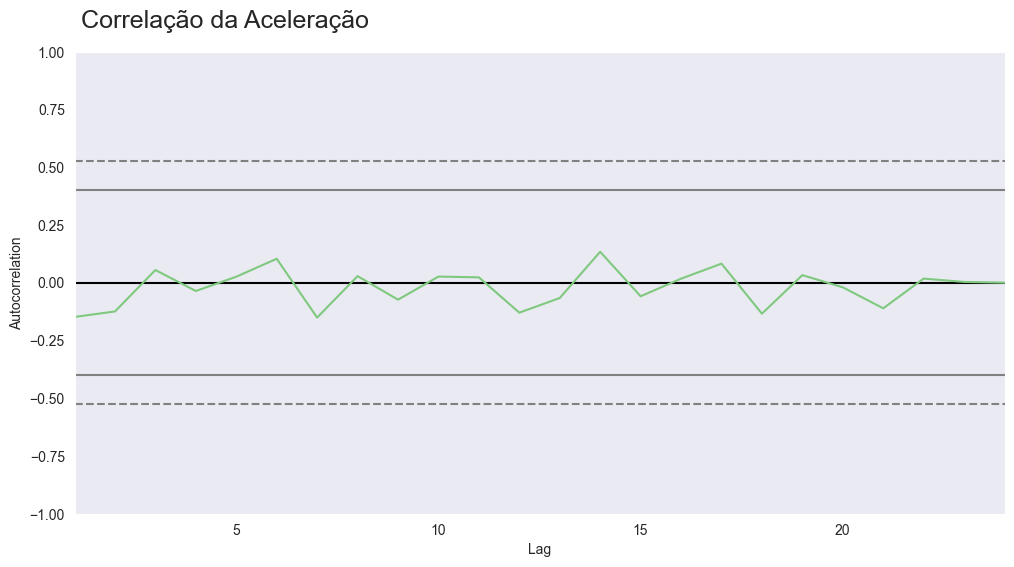

In [71]:
ax = plt.figure(figsize = (12,6))
ax.suptitle('Correlação da Aceleração', fontsize = 18, x = 0.25, y = 0.95)
autocorrelation_plot(alucar.Aceleracao)
ax = ax

## Alucar --> Analisando Assinates Newsletter

In [72]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.rename(columns = {'mes': 'Mes', 'assinantes': 'Assinantes'}, inplace = True)
assinantes.head() 

,Mes,Assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [73]:
assinantes.shape

(24, 2)

In [74]:
assinantes.isna().sum().sum()

0

In [75]:
assinantes.dtypes

Mes           object
Assinantes     int64
dtype: object

In [76]:
assinantes['Aumento'] = assinantes.Assinantes.diff()
assinantes.Aumento = assinantes.Aumento.fillna(0)
assinantes['Aceleracao'] = assinantes.Aumento.diff()
assinantes.Aceleracao = assinantes.Aceleracao.fillna(0)
assinantes.head()

,Mes,Assinantes,Aumento,Aceleracao
0,2017-01-31,0,0.0,0.0
1,2017-02-28,10,10.0,10.0
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


In [77]:
assinantes['Mes'] = pd.to_datetime(alucar['Mes'])
assinantes.dtypes

Mes           datetime64[ns]
Assinantes             int64
Aumento              float64
Aceleracao           float64
dtype: object

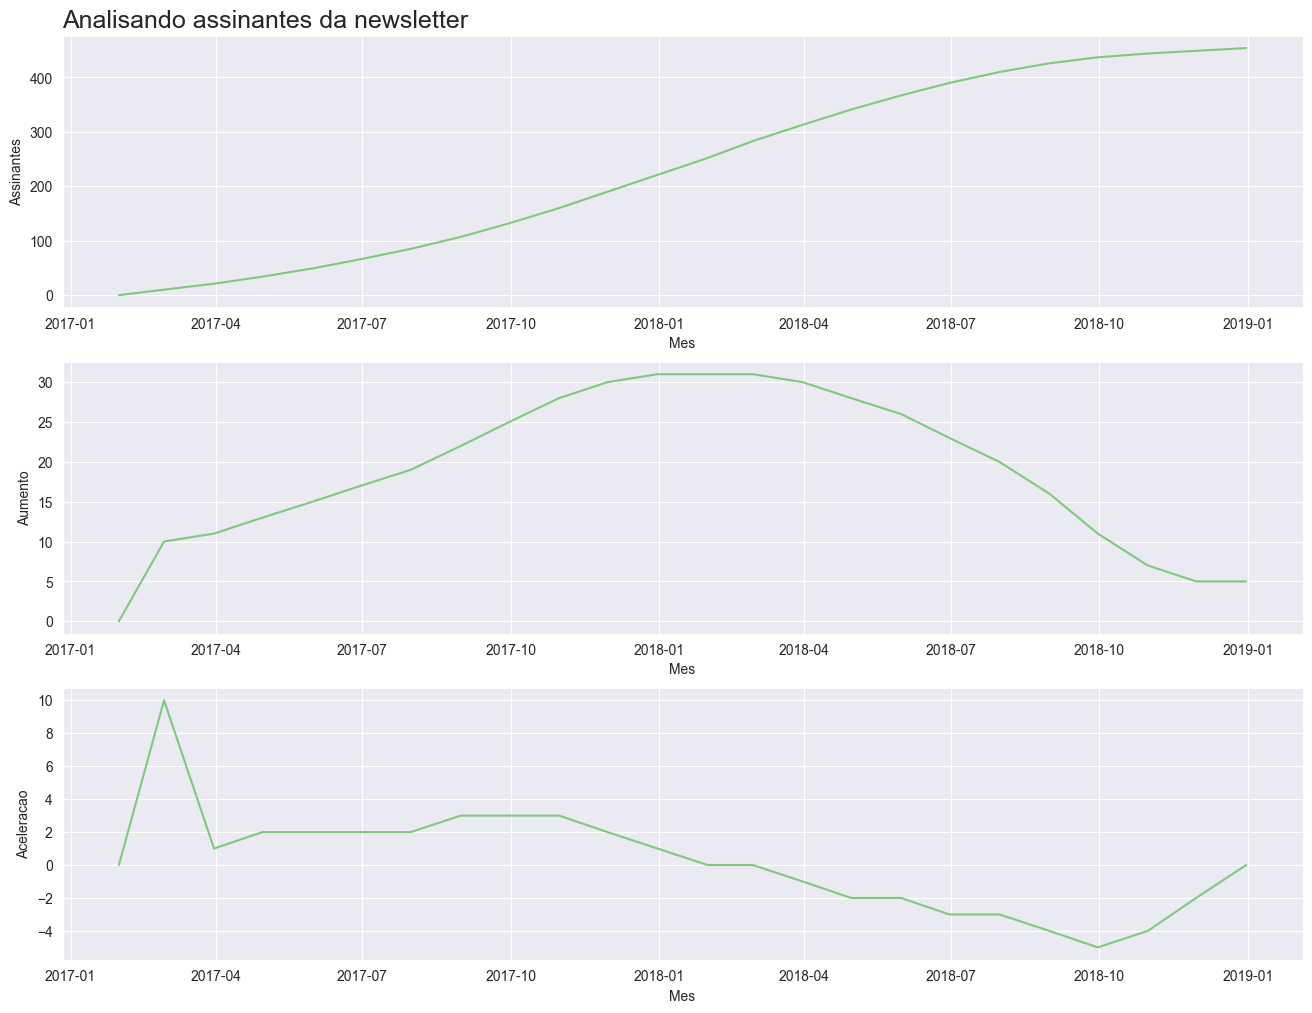

In [78]:
plot_de_comparacao( 'Analisando assinantes da newsletter',
     'Mes', 'Assinantes', 'Aumento', 'Aceleracao', assinantes)

## Chocolura --> Analisando as Vendas

In [79]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.rename(columns = {'mes': 'Mes', 'vendas': 'Vendas'}, inplace = True)
chocolura.head()

,Mes,Vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [80]:
chocolura.dtypes

Mes       object
Vendas     int64
dtype: object

In [81]:
chocolura.Mes = pd.to_datetime(chocolura.Mes)
chocolura.dtypes

Mes       datetime64[ns]
Vendas             int64
dtype: object

In [82]:
chocolura.isna().sum().sum()

0

In [83]:
chocolura['Aumento'] = chocolura.Vendas.diff()
chocolura.Aumento = chocolura.Aumento.fillna(0)
chocolura['Aceleracao'] = chocolura.Aumento.diff()
chocolura.Aceleracao = chocolura.Aceleracao.fillna(0)
chocolura.head()

,Mes,Vendas,Aumento,Aceleracao
0,2017-01-01,210,0.0,0.0
1,2017-02-01,185,-25.0,-25.0
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


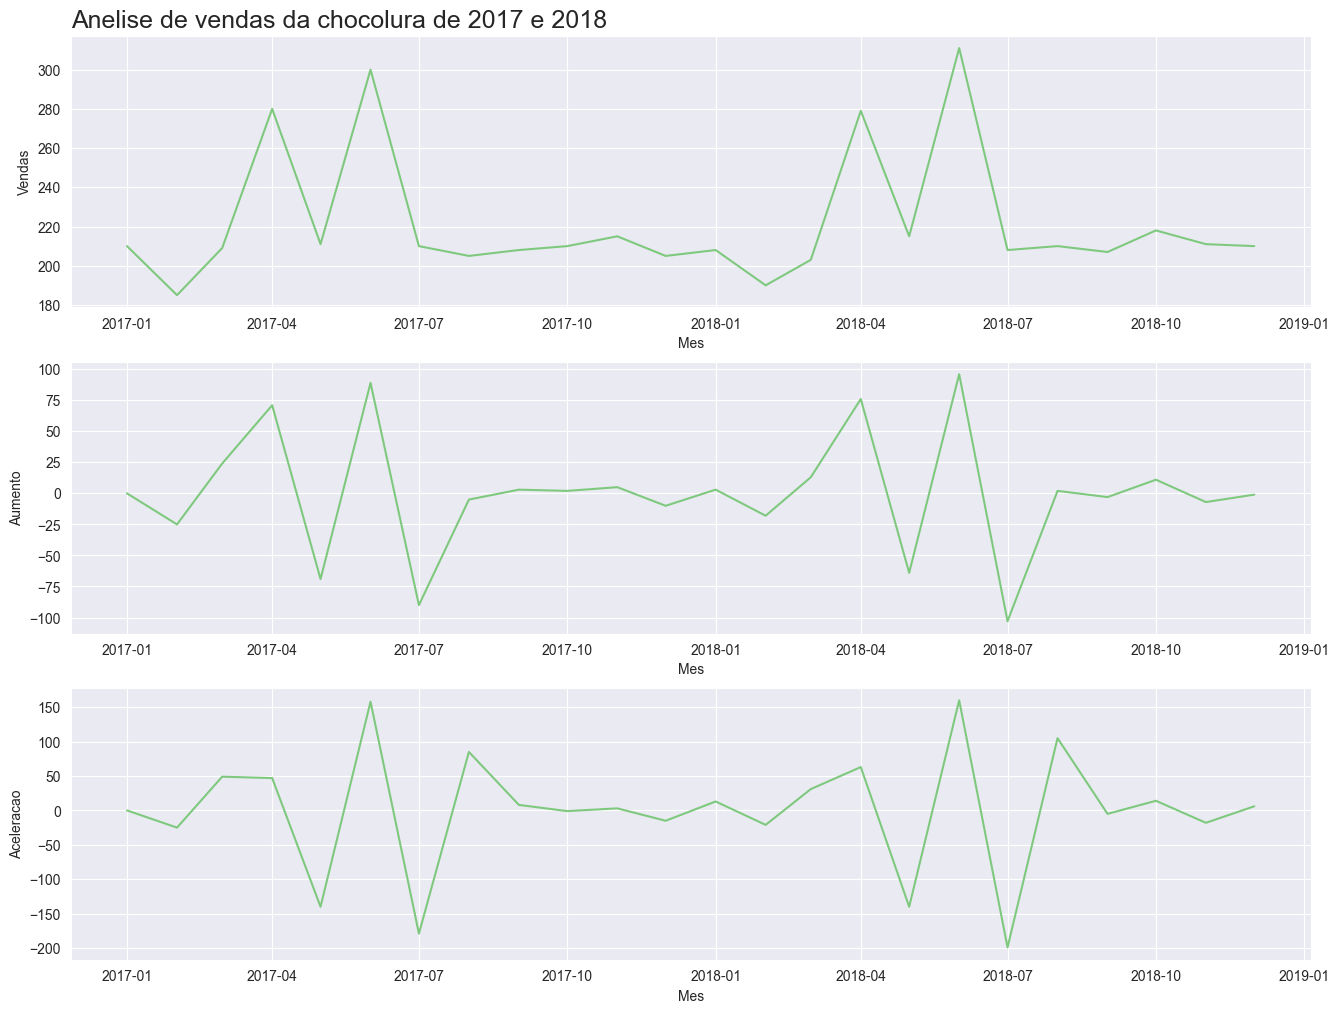

In [84]:
plot_de_comparacao('Anelise de vendas da chocolura de 2017 e 2018', 'Mes',
    'Vendas', 'Aumento', 'Aceleracao', chocolura)

## Chocolura vendas diarias de outubro e novembro

In [85]:
vendas_diarias = pd.read_csv('vendas_por_dia.csv')
vendas_diarias.rename(columns = {'dia': 'Dia', 'vendas': 'Vendas'}, inplace = True)
vendas_diarias.head()


,Dia,Vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [86]:
vendas_diarias.shape

(61, 2)

In [87]:
vendas_diarias.isna().sum().sum()

0

In [88]:
vendas_diarias.dtypes

Dia       object
Vendas     int64
dtype: object

In [89]:
vendas_diarias.Dia = pd.to_datetime(vendas_diarias.Dia)
vendas_diarias.dtypes

Dia       datetime64[ns]
Vendas             int64
dtype: object

In [90]:
vendas_diarias['Aumento'] = vendas_diarias.Vendas.diff()
vendas_diarias.Aumento = vendas_diarias.Aumento.fillna(0)
vendas_diarias['Aceleracao'] = vendas_diarias.Aumento.diff()
vendas_diarias.Aceleracao = vendas_diarias.Aceleracao.fillna(0)
vendas_diarias.head()

,Dia,Vendas,Aumento,Aceleracao
0,2018-10-01,50,0.0,0.0
1,2018-10-02,48,-2.0,-2.0
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


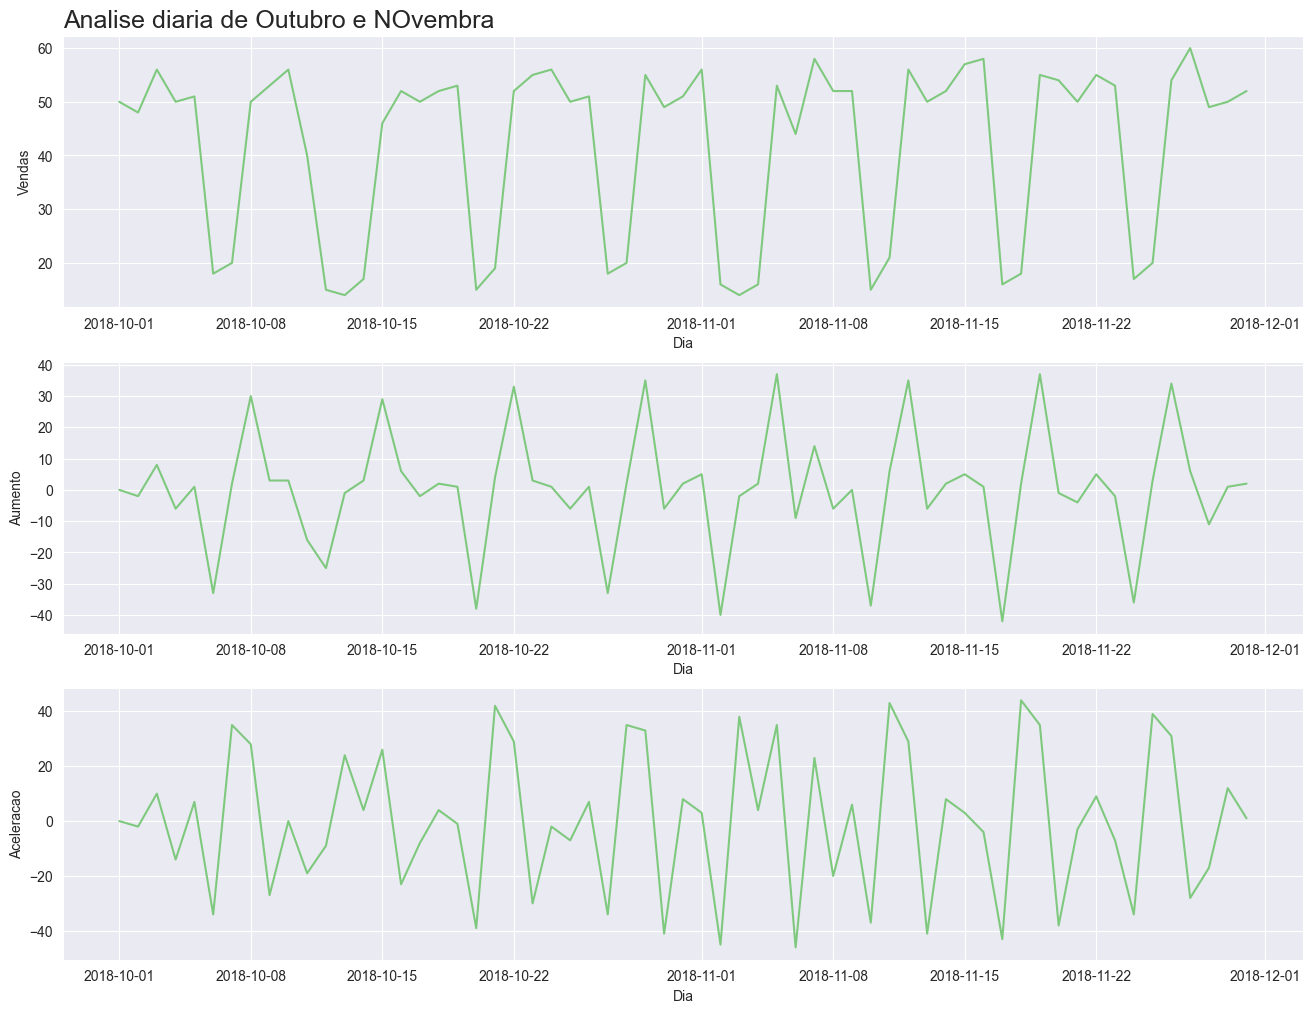

In [92]:
plot_de_comparacao('Analise diaria de Outubro e NOvembra', 'Dia',
    'Vendas', 'Aumento', 'Aceleracao', vendas_diarias)

## Analisando a sazanolidade Chocolura Nov e Out

In [102]:
vendas_diarias['Dia_da_semana'] = vendas_diarias.Dia.dt.day_name()

In [103]:
vendas_diarias.head()

,Dia,Vendas,Aumento,Aceleracao,Dia_da_semana
0,2018-10-01,50,0.0,0.0,Monday
1,2018-10-02,48,-2.0,-2.0,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [105]:
vendas_diarias.Dia_da_semana.unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [108]:
dia_traduzido ={ 'Monday': 'Segunda', 
    'Tuesday': 'Terça', 
    'Wednesday': 'Quarta', 
    'Thursday': 'Quinta', 
    'Friday': 'Sexta',
    'Saturday': 'Sabado', 
    'Sunday': 'Domingo' }

In [111]:
vendas_diarias.Dia_da_semana = vendas_diarias.Dia_da_semana.map(dia_traduzido)
vendas_diarias.head(7)

,Dia,Vendas,Aumento,Aceleracao,Dia_da_semana
0,2018-10-01,50,0.0,0.0,NaN
1,2018-10-02,48,-2.0,-2.0,NaN
2,2018-10-03,56,8.0,10.0,NaN
3,2018-10-04,50,-6.0,-14.0,NaN
4,2018-10-05,51,1.0,7.0,NaN
5,2018-10-06,18,-33.0,-34.0,NaN
6,2018-10-07,20,2.0,35.0,NaN
